In [1]:
import seaborn as sns

sns.set_theme(style='whitegrid')
tips = sns.load_dataset("tips")

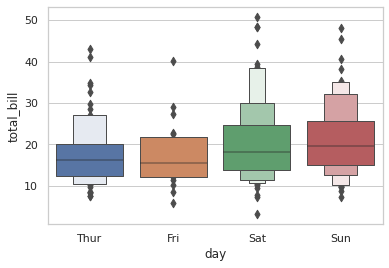

In [2]:
ax = sns.boxenplot(x='day', y='total_bill', data=tips )

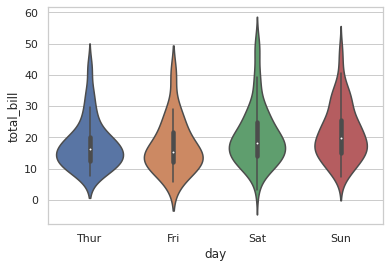

In [5]:
ax = sns.violinplot(x='day', y='total_bill', data=tips )

In [6]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

# Extracting data for plotting
data = pd.read_csv('candlestick_python_data.csv')
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Data'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels and titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Fromatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'mpl_finance'

# Geospatial Visualization

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot
%matplotlib inline


<AxesSubplot:>

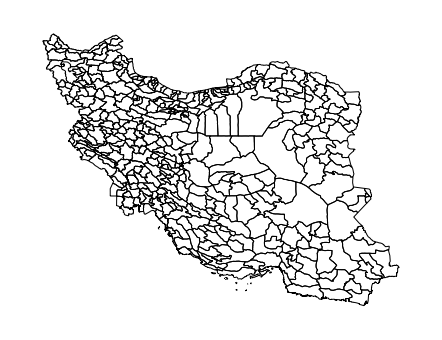

In [2]:
gdf = gpd.read_file('irn_admbnda_adm2_unhcr_20190514.shp') #adm1 -- Province, ADM layer2
gdf = gdf[['ADM2_FA', 'ADM2_EN', 'ADM1_FA', 'ADM1_EN', 'geometry']]
gdf['ADM2_FA'] = gdf['ADM2_FA'].apply(lambda x: x[8:])
geoplot.polyplot(gdf)


In [3]:
df = pd.read_excel('population-urban-95.xlsx', index_col='فهرست ')
# df.columns
df2 = df.groupby('شهرستان').sum()
df2['nesbat'] = df2['زن']/df2['جمعیت']
gdf.jont(df2['nesbat'],on='ADM2_FA')

KeyError: 'جمعیت'

In [4]:
def regularize_unicode(s):
    s = s.str.replace('ک', '')
    s = s.str.replace('ی', '')
    s = s.str.replace(' ', '')
    s = s.str.replace(chr(8204), '')
    return s

df2.index = regularize_unicode(df2.index)
gdf['ADM2_FA'] = regularize_unicode(gdf['ADM2_FA'])

gdf.join(df2['nesbat'], on='ADM2_FA')

KeyError: 'nesbat'

In [ ]:
geoplot.choropleth(gdf, hue='nesbat', cmap='Spectra', figsize(14,8), legend=True, edgecolor='white', linewidth='0.3')